In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [32]:
var=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score']

In [43]:
df_vg=pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df_vg=df_vg[var]
df_vg=df_vg.dropna().reset_index()
df_vg.head()

,index,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score
0,0,41.36,28.96,3.77,8.45,82.53,76.0
1,2,15.68,12.76,3.79,3.29,35.52,82.0
2,3,15.61,10.93,3.28,2.95,32.77,80.0
3,6,11.28,9.14,6.50,2.88,29.80,89.0
4,7,13.96,9.18,2.93,2.84,28.92,58.0


In [44]:
X = df_vg.drop('Critic_Score',1)   #Características
y = df_vg['Critic_Score']          #target

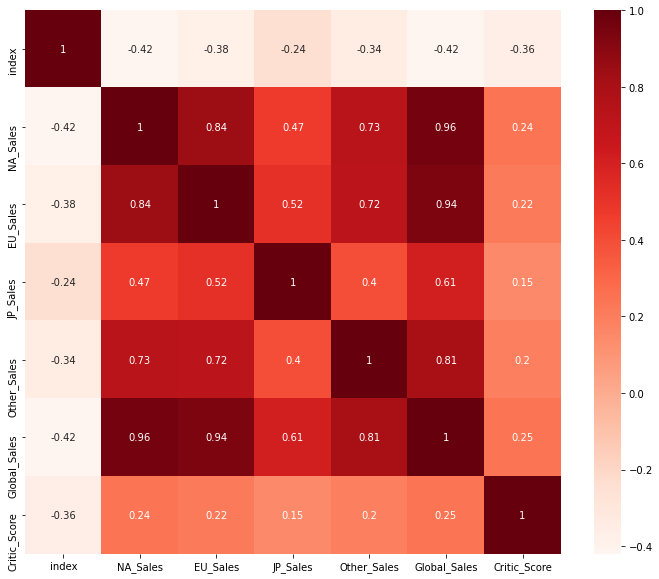

In [45]:
plt.figure(figsize=(12,10))
cor = df_vg.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [48]:
#Correlación respecto a la variable de salida o target
cor_target = abs(cor['Critic_Score'])

#Selección de características altamente correlacionadas
relevant_features = cor_target[cor_target>0.5]
relevant_features

Critic_Score    1.0
Name: Critic_Score, dtype: float64

            attack  spattack
attack    1.000000  0.398984
spattack  0.398984  1.000000
           spdefense    attack
spdefense   1.000000  0.281151
attack      0.281151  1.000000
           spdefense   defense
spdefense   1.000000  0.548948
defense     0.548948  1.000000


In [49]:
#Agregar una columna constante de unos, obligatorio para el modelo sm.OLS
X_1 = sm.add_constant(X)

#Ajuste del modelo sm.OLS
model = sm.OLS(y,X_1).fit()
model.pvalues.sort_values(ascending=False)

JP_Sales         1.516831e-01
Other_Sales      1.478041e-01
NA_Sales         1.460106e-01
EU_Sales         1.398618e-01
Global_Sales     1.350804e-01
index           1.863077e-164
const            0.000000e+00
dtype: float64

In [50]:
#Backward Elimination
cols = list(X.columns)
pmax = 1

while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_features_BE = cols
print(selected_features_BE)

['index', 'Global_Sales']


In [51]:
model = LinearRegression()

#Método RFE
rfe = RFE(model, 7, verbose=1)

#Transformando los datos usando el método RFE
X_rfe = rfe.fit_transform(X,y)  

#Encontrando el modelo de los datos
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True]
[1 1 1 1 1 1]


In [52]:
#Número de características
nof_list = np.arange(1,13)            
high_score = 0

#Proceso para almacenar las características óptimas
nof = 0           
score_list = []

for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Número óptimo de características: %d" %nof)
print("Desempeño con %d características: %f" % (nof, high_score))

Número óptimo de características: 6
Desempeño con 6 características: 0.139361
